In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [3]:
x, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

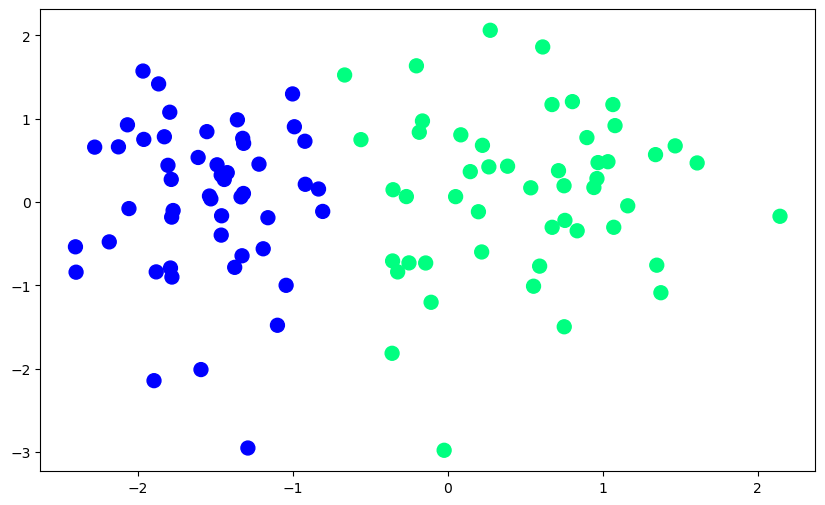

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

In [5]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [26]:
class MyPerception:

    def __init__(self,lr,epoch):
        self.lr = lr
        self.epoch = epoch
        self.m = None
        self.b = None

    def step(self,n):
        return 1 if n>0 else 0

    def fit(self,x_train,y_train):
        x_train = np.insert(x_train,0,1,axis=1)
        w = np.ones(x_train.shape[1])

        for i in range(self.epoch):
            j = np.random.randint(0,x_train.shape[0])
            y_hat = self.step(np.dot(x_train[j],w))
            w += self.lr*(y_train[j]-y_hat)*x_train[j]
        
        intercept = w[0]
        coef = w[1:]
        self.m = -(coef[0]/coef[1])
        self.b = -(intercept/coef[1])
        print(self.b,self.m)
    
    def predict(self,x_test):
        return np.dot(self.m,x_test)+self.b

In [27]:
mp = MyPerception(0.1,100)
mp.fit(x_train,y_train)

-357.343201644029 -475.14229033525925


In [28]:
x_input = np.linspace(-3,3,100)
y_input = mp.m*x_input + mp.b

(-3.0, 2.0)

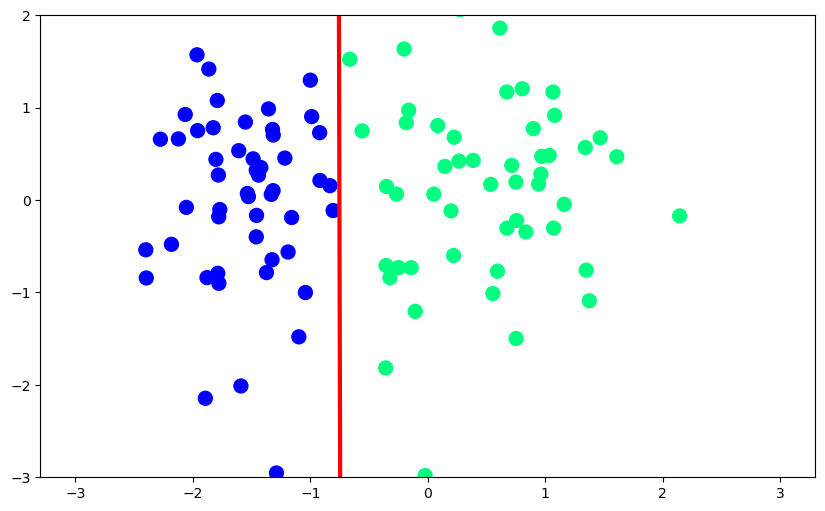

In [29]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [30]:
def step(n):
        return 1 if n>0 else 0

In [31]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [33]:
m,b = perceptron(x,y)

In [34]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [36]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

<IPython.core.display.Javascript object>

In [38]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(x,y)

LogisticRegression()

In [39]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [40]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

In [42]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

<IPython.core.display.Javascript object>

(-3.0, 2.0)